Тема урока: регулярные выражения
Использование границ
Границы слова
Границы строк
Аннотация. Урок посвящен изучению регулярных выражений.

Использование границ

Регулярные выражения находят соответствие с шаблоном в любой части текста.

In [1]:
import re
regex = r'cat'

s = "The cat scattered his food all over the room."
re.findall(regex, s)

['cat', 'cat']

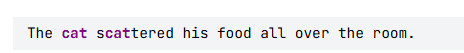

In [3]:
from functions import picture
picture('Без имcfhени.png')

Регулярное выражение cat соответствует всем вхождениям последовательности символов cat, даже вхождению в слове scattered. Для многих задач такое поведение является правильным. Однако несложно придумать задачу, где такое поведение не является правильным. Например, если в результате поиска мы хотим заменить все вхождения слова cat на слово dog, то получим следующий результат:

The dog sdogtered his food all over the room.

Это заставляет нас учитывать границы и использовать специальные метасимволы для определения позиций перед шаблоном и после него.

Границы слова

Метасимвол \b соответствует границе слова. Под границей слова подразумевается пустое пространство между двумя символами, одним из которых является буква, цифра или символ подчеркивания (\w), а вторым — символ, который не является буквой, цифрой или символом подчеркивания (\W). Символ \b в основном используется для определения начала и конца слова.

In [1]:
import re
regex = r'\bcat\b'

s = "The cat scattered his food all over the room."
re.findall(regex, s)

['cat']

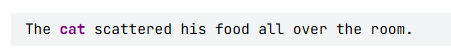

In [4]:
picture('Без имhgiени.png')

Перед словом cat и после него есть пробел. Между пробелом и буквой c (в начале слова) или t (в конце слова) есть невидимая граница, которая отделяет эти буквы от символа пробела. Именно этой границе и соответствует метасимвол \b, поэтому было найдено только отдельное слово cat. Вхождение cat в слово scattered не соответствует этому регулярному выражению, потому что в слове scattered ему предшествует символ s, а после него идет символ t, ни один из которых не соответствует символам \W.

Важно помнить, что для того чтобы найти слово целиком, символ \b должен использоваться и перед, и после текста, с которым будет установлено соответствие.

In [5]:
import re
regex = r'\bcap'

s = "The captain wore his cap and cape proudly as he sat listening to the recap of how his crew saved the men from a capsized vessel."
re.findall(regex, s)

['cap', 'cap', 'cap', 'cap']

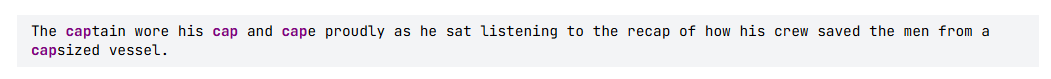

In [8]:
picture('Без имеgfuни.png')

Регулярное выражение \bcap соответствует любому слову, которое начинается с cap, поэтому были найдены четыре слова, причем три из них не являются словом cap.

In [9]:
import re
regex = r'cap\b'

s = "The captain wore his cap and cape proudly as he sat listening to the recap of how his crew saved the men from a capsized vessel."
re.findall(regex, s)

['cap', 'cap']

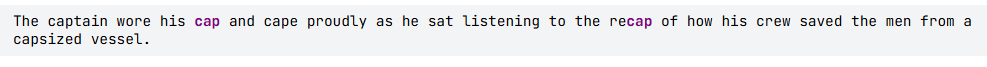

In [10]:
picture('Без именghи.png')

Регулярное выражение cap\b соответствует любому слову, которое заканчивается на cap, поэтому были найдены два совпадения, включая то слово, которое не является словом cap.

Символ \b не соответствует какому-либо символу, он соответствует позиции. Поэтому длина строки, которая находится регулярным выражением \bcap\b равна трем, а не пяти символам.

Метасимвол \B соответствует границе, которая не является границей слова. Такая граница может находиться между любыми двумя символами кроме тех, между которыми определяется граница, соответствующая метасимволу \b. Метасимвол \B в основном используется для определения границ внутри слова, то есть для нахождения части слова.

In [11]:
import re
regex = r'\Bas\B'

s = "Please enter the nine-digit id as it appears on your color - coded pass-key."
re.findall(regex, s)

['as', 'as']

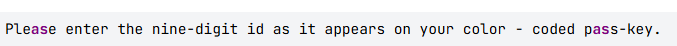

In [12]:
picture('Без имеdstни.png')

Регулярному выражению \Bas\B соответствует последовательность латинских букв as, которая не окружена символами границы слова. Само слово as не соответствует шаблону, но последовательность букв as в словах Please и pass шаблону соответствует. Регулярное выражение \Bas\B позволяет определить местонахождение сочетания as внутри других слов.

 Метасимволы в верхнем регистре обычно отрицают функциональные возможности их эквивалентов в нижнем регистре.

Определение границ строк

Границы слов позволяют указать местонахождение совпадений относительно позиции в слове (начало слова, конец слова, полностью слово). Границы строк выполняют подобную функцию, но используются для нахождения соответствий с шаблоном регулярного выражения в начале или конце всей строки.

Метасимволы для границ строк – крышка ^ (начало строки) и доллар $ (конец строки).

In [13]:
import re
regex = r'^[Hh]ello'

s = "Hello, Timur. I haven't seen you for ages. I want to be his favorite hello and his hardest goodbye."
re.findall(regex, s)

['Hello']

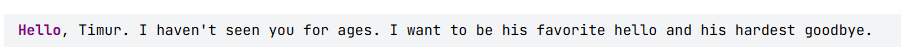

In [14]:
picture('Без ивкрнмени.png')

Обратите внимание на то, что если убрать символ крышки из регулярного выражения [Hh]ello, то будет найдено еще одно соответствие:

In [15]:
import re
regex = r'[Hh]ello'

s = "Hello, Timur. I haven't seen you for ages. I want to be his favorite hello and his hardest goodbye."
re.findall(regex, s)

['Hello', 'hello']

Аналогичным образом используется символ $. Этот символ помогает проверить, что строка текста оканчивается определенным образом.

In [16]:
import re
regex = r'[Gg]oodbye$'

s = "Goodbye my dear friend, goodbye! I miss you so much. Goodbye"
re.findall(regex, s)

['Goodbye']

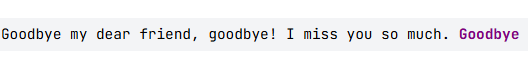

In [17]:
picture('dfyимени.png')

Примечания

Примечание 1. Механизмы регулярных выражений не понимают английский, русский или любой другой язык, и поэтому они не могут определить границы слова. Символ \b просто соответствует позиции между символом, который является обычно частью слова (слова состоят из алфавитно-цифровых символов и символа подчеркивания, то есть представляют собой текст, который состоит из символов, соответствующих \w) и символом, который не может быть частью слова (текст, который состоит из символов, соответствующих \W).

In [18]:
import re
regex = r'\b...\b'

s = "abc fffffffff 123     ... ff5 --- ___ 5_p python stepik +-* 456"
re.findall(regex, s)

['abc', '123', 'ff5', '___', '5_p', '456']

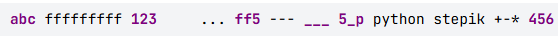

In [19]:
picture('gfuени.png')

Примечание 2. Метасимвол ^ имеет несколько значений. Этот символ отрицает набор, только если находится в наборе (то есть заключен в квадратные скобки [ и ]) и является первым символом после открывающей скобки [. Вне набора и в начале шаблона символ ^ соответствует началу строки.

Примечание 3. Наглядное представление границ, определяемых метасимволами \b, \B, ^ и $.

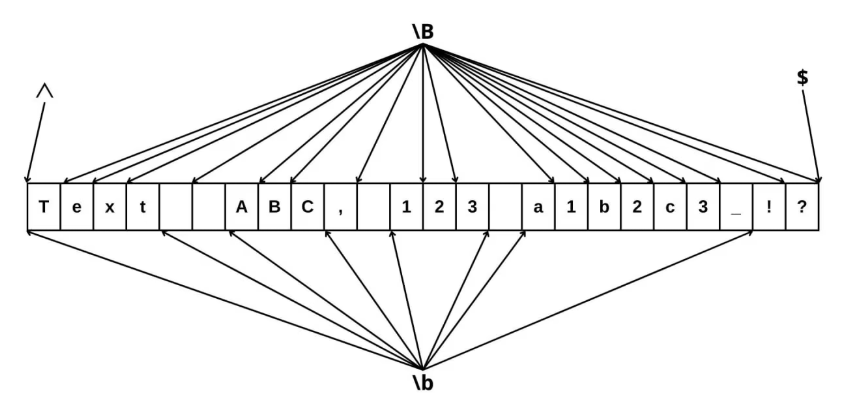

In [22]:
picture('Без именghiи.png')

In [25]:
import re
regex = (r'\bcat', r'cat\b', r'\bcat\b', r'\Bcat', r'cat\B', r'\Bcat\B')

s = "Some words contain the word cat: scat, ducati, alcatel, catalyst, worldcat and of course cat!"
for pattern in regex:
    print(len(re.findall(pattern, s)))

3
4
2
4
3
2


In [26]:
import re
regex = r'\b\w+\b'

s = "It was very helpful, thank you"
re.findall(regex, s)

['It', 'was', 'very', 'helpful', 'thank', 'you']

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют слова a, A, an и An.

Примечание 1. Словом будем считать последовательность символов, соответствующих \w, окруженную символами, соответствующими \W

In [45]:
import re
regex = r'\b[Aa]\b|\b[Aa]n\b'
regex = r'\b[Aa]n?\b'

s = "A cow is an animal."
s = "I have been reading this text for aN hour. Сan you give me this book? AN or an apple"
re.findall(regex, s)

['an']

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют слова, написанные строго заглавными латинскими буквами.

Примечание 1. Словом будем считать последовательность символов, соответствующих \w, окруженную символами, соответствующими \W

In [70]:
import re
regex = r'\b[A-Z]+\b'

s = "Why isn’t my progress in the APP synchrONized with my progress in the WEB version?"
s = "OOO 'BEEGEEK'"
s = "I will go to the shop aNd you stay At home"
re.findall(regex, s)

['I']

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют слова, начинающиеся с латинской заглавной буквы.

Примечание 1. Словом будем считать последовательность символов, соответствующих \w, окруженную символами, соответствующими \W

In [93]:
import re
regex = r'\b[A-Z]\w{0,}'
# regex = r'\b[A-Z]\w*.*?'

s = "I signed up in the app using my Apple ID. How can I sign in to the web version?"
s = "Gпривет, KAкдела_ _______Aтуктуктук_______, Aтуктуктукячеловекпаук___"
re.findall(regex, s)

['Gпривет', 'KAкдела_', 'Aтуктуктукячеловекпаук___']

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют строки, содержащие открывающую круглую скобку, а за ней когда-нибудь закрывающую круглую скобку.

In [115]:
import re
regex = r'.*\(.*\).*'

s = "A synthesizer (also spelled synthesiser) is an electronic musical instrument that generates audio signals._"
s = "(41 + 9) * 2 = ?"
s = "It was to be both a technical and surprisingly emotional challenge!))"
re.findall(regex, s)

[]

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют строки, удовлетворяющие одновременно всем следующим условиям:

строка начинается с двух или более цифр
после следуют ноль или более букв латинского алфавита в нижнем регистре
строка оканчивается нулем или более букв латинского алфавита в верхнем регистре

In [118]:
import re
regex = r'\b\d{2,}[a-z]{0,}[A-Z]{0,}\b'
regex = r'^\d{2,}[a-z]*[A-Z]*$'

s = "51tePIK"
re.findall(regex, s)

['51tePIK']

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют строки, удовлетворяющие одновременно всем следующим условиям:

строка содержит исключительно буквы латинского алфавита в произвольном регистре
строка оканчивается латинской буквой s в нижнем регистре

In [143]:
import re
# Когда ^ стоит в начале выражения (за пределами квадратных скобок), он означает, что выражение должно совпадать только с начала строки.
regex = r'\b^[A-Za-z]*s$'

s = "Chess"
s = "Diablo"
s = "exodus"
s = "helow mydearfriends"
re.findall(regex, s)

[]

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют строки длины 45, удовлетворяющие одновременно всем следующим условиям:

первые 40 символов являются латинскими буквами произвольного регистра или четными цифрами
последние 5 символов являются нечетными цифрами или символами пробела

In [159]:
import re
regex = r'^[A-Za-z02468]{40}[13579\s]{5}'

s = "BpOBNpqKg4EgPKxWn8wavcQMOP06nbCwvOdu6CPj11111"
s = "BTJubHCvbwTQEN2BqQJsgAIDW4bcyFyUp4COdUO4 3791"
s = "Sufk6dm7ECNGRlJ7VsIB7HvBOvSgAoN9gIUOqwy4"
s = "BTJubHCvbwTQEN2BqQJsgAIDW4bcyFyUp4COdUO4 379199999999"
s = "pmlRZqwHN3Vnw1d1kBI53PQHBGOjuXTkRBBhE5zV8202"
re.findall(regex, s)

['BTJubHCvbwTQEN2BqQJsgAIDW4bcyFyUp4COdUO4 3791']

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют строки, удовлетворяющие одновременно всем следующим условиям:

строка начинается с Mr., Mrs., Ms., Dr. или Er.
оставшаяся часть строки состоит только из одной или более букв латинского алфавита в произвольном регистре

In [201]:
import re
regex = r'^(Ms|Mrs?|Dr|Er)\.[A-Za-z]+$'

s = "Mr.Guev"
s = "Ms.Jones"
# s = "MRS.Traveler"
# s = "DDr.Pedro"
s = "M.Timur"
re.findall(regex, s)

[]

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют строки, удовлетворяющие одновременно всем следующим условиям:

строка начинается с одной или двух цифр
после следуют три или более буквы латинского алфавита в произвольном регистре
строка заканчивается тремя или менее точками

In [202]:
import re
regex = r'^[0-9]{1,2}[A-Za-z]{3,}\.{,3}$'

s = "71mur..."
re.findall(regex, s)

['71mur...']